In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sew_df = pd.read_csv('metrics/sew_mixed_metrics.csv')
games_df = pd.read_csv('metrics/games_mixed_metrics.csv')

games_df.columns

Index(['domain', 'trial_type', 'add_data', 'correctly_predicted',
       'incorrectly_predicted', 'total_predicted_positives',
       'ground_truth_positives', 'TP', 'TN', 'FP', 'FN', 'accuracy',
       'precision', 'recall', 'f1'],
      dtype='object')

In [3]:
''' Possible metrics:   'correctly_predicted',
                       'incorrectly_predicted', 'total_predicted_positives',
                       'ground_truth_positives', 'TP', 'TN', 'FP', 'FN', 'accuracy',
                       'precision', 'recall', 'f1' '''

met = 'f1'
y_lim = 1 #set this to the max possible for the selected metric

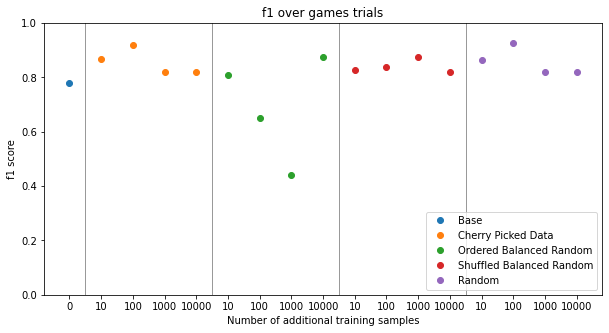

In [5]:
types = ['ba', 'cp','re','es', 'ra']
t_dict = {'ba': 'Base', 'cp': 'Cherry Picked Data', 're': 'Ordered Balanced Random', 'ra': 'Random', 'es': 'Shuffled Balanced Random'}

fig, axes = plt.subplots(figsize=(10,5)) 

for t in types:
    tmp = games_df[games_df['trial_type']==t]

    plt.plot(tmp[met], 'o', label=t_dict[t]);
    
axes.set_xticks(ticks=[x for x in range(17)])
axes.set_xticklabels(labels=[0] + [10, 100, 1000, 10000]*4)
plt.axvline(color='grey',x=0.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=4.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=8.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=12.5, alpha=0.8, lw=1)
plt.ylabel(f'{met} score')
plt.xlabel('Number of additional training samples')
plt.ylim(0,y_lim)
plt.legend()
plt.title(f'{met} over games trials');

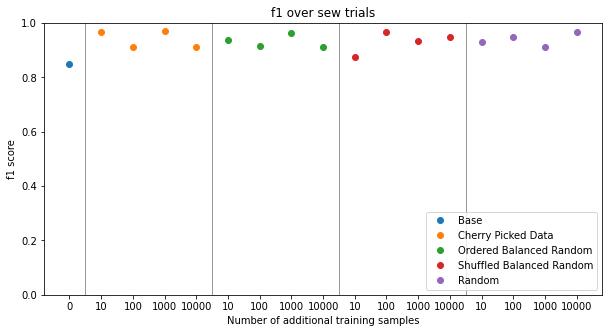

In [6]:
fig, axes = plt.subplots(figsize=(10,5))
for t in types:
    tmp = sew_df[sew_df['trial_type']==t]

    plt.plot(tmp[met], 'o', label=t_dict[t]);
    
axes.set_xticks(ticks=[x for x in range(17)])
axes.set_xticklabels(labels=[0] + [10, 100, 1000, 10000]*4)
plt.axvline(color='grey',x=0.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=4.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=8.5, alpha=0.8, lw=1)
plt.axvline(color='grey',x=12.5, alpha=0.8, lw=1)
plt.ylabel(f'{met} score')
plt.xlabel('Number of additional training samples')
plt.ylim(0,y_lim)
plt.legend()
plt.title(f'{met} over sew trials');

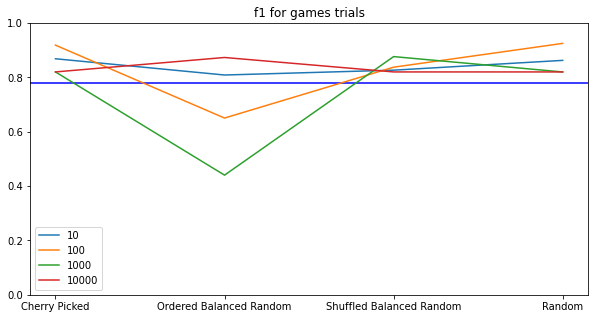

In [7]:
fig, axes = plt.subplots(figsize=(10,5))
x = True
for t in [0, 10, 100, 1000, 10000]:
    tmp = games_df[games_df['add_data']==t]
    #print(tmp['model'])
    if x:
        #plt.plot(tmp[met], '.', label='Base' )
        plt.axhline(y = float(tmp[met]), color = 'blue', linestyle = '-')
        x=False
    else:
        plt.plot(tmp['trial_type'], tmp[met], label=t)
        
axes.set_xticks(ticks=[0, 1, 2, 3])
axes.set_xticklabels(labels=['Cherry Picked','Ordered Balanced Random','Shuffled Balanced Random', 'Random'])
plt.title(f'{met} for games trials')
plt.ylim(0,y_lim)
plt.legend();

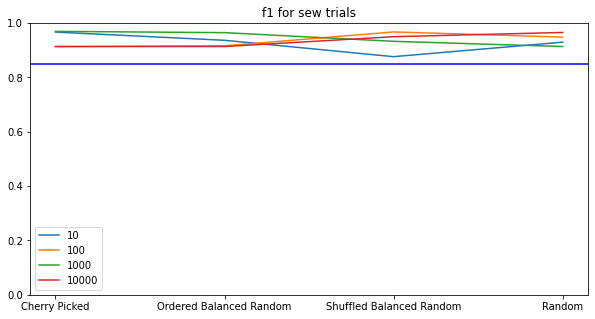

In [8]:
fig, axes = plt.subplots(figsize=(10,5))
x = True
for t in [0, 10, 100, 1000, 10000]:
    tmp = sew_df[sew_df['add_data']==t]
    #print(tmp['model'])
    if x:
        #plt.plot(tmp[met], '.', label='Base' )
        plt.axhline(y = float(tmp[met]), color = 'blue', linestyle = '-')
        x=False
    else:
        plt.plot(tmp['trial_type'], tmp[met], label=t)
        
axes.set_xticks(ticks=[0, 1, 2, 3])
axes.set_xticklabels(labels=['Cherry Picked','Ordered Balanced Random','Shuffled Balanced Random', 'Random'])
plt.ylim(0,y_lim)
plt.title(f'{met} for sew trials')
plt.legend();